Scenario: Healthcare – Predicting Patient Readmission
A hospital wants to predict whether patients will be readmitted (1) or not (0) based on:
Length of stay (days)
Number of lab tests
Satisfaction score (1–10)
Just like in your IT company attrition example, a single decision tree might miss subtle patterns. Gradient Boosting builds multiple trees, each correcting the errors of the previous ones, until predictions become strong and reliable.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("healthcare_readmission_200.csv")
df.shape

(200, 4)

In [4]:
df.head(2)

,Length_of_stay,Num_lab_tests,Satisfaction_score,Readmitted
0,7,10,6,0
1,4,32,7,0


In [5]:
X=df.drop(columns=["Readmitted"])
y=df["Readmitted"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gb_model=GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42

)

In [17]:
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)

In [18]:
print("Accuracy = ",accuracy_score(y_test,y_pred))

Accuracy =  0.7666666666666667


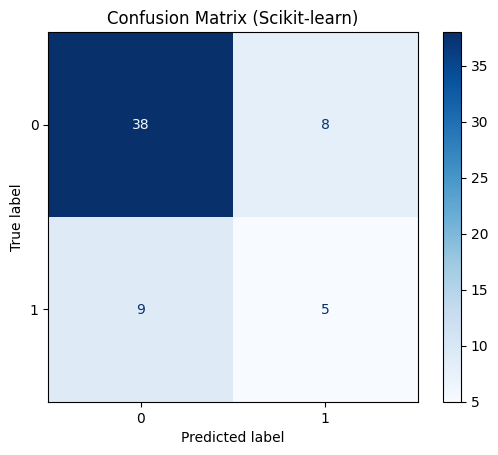

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=gb_model.classes_)

class_names = df["Readmitted"].unique()
# 3. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues) # You can change the color map (e.g., 'Greens', 'plasma')
plt.title("Confusion Matrix (Scikit-learn)")
plt.show()